In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("lstm_era (+discharge)/lstm_era_d_0911_011342/eval.csv")
df.head()

,basin,NSE_train,KGE_train,NSE_validation,KGE_validation,NSE_test,KGE_test
0,11001,0.990458,0.990465,0.982410,0.981173,0.944979,0.971112
1,11063,0.957211,0.961665,0.886420,0.876389,0.949594,0.957487
2,11068,0.983469,0.949454,0.955256,0.970904,0.971133,0.973331
3,11077,0.883147,0.904807,0.888377,0.901268,0.723893,0.874677
4,11090,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
nse_val_mean = df['NSE_validation'].mean()
nse_test_mean = df['NSE_test'].mean()
nse_val_median = df['NSE_validation'].median()
nse_test_median = df['NSE_test'].median()

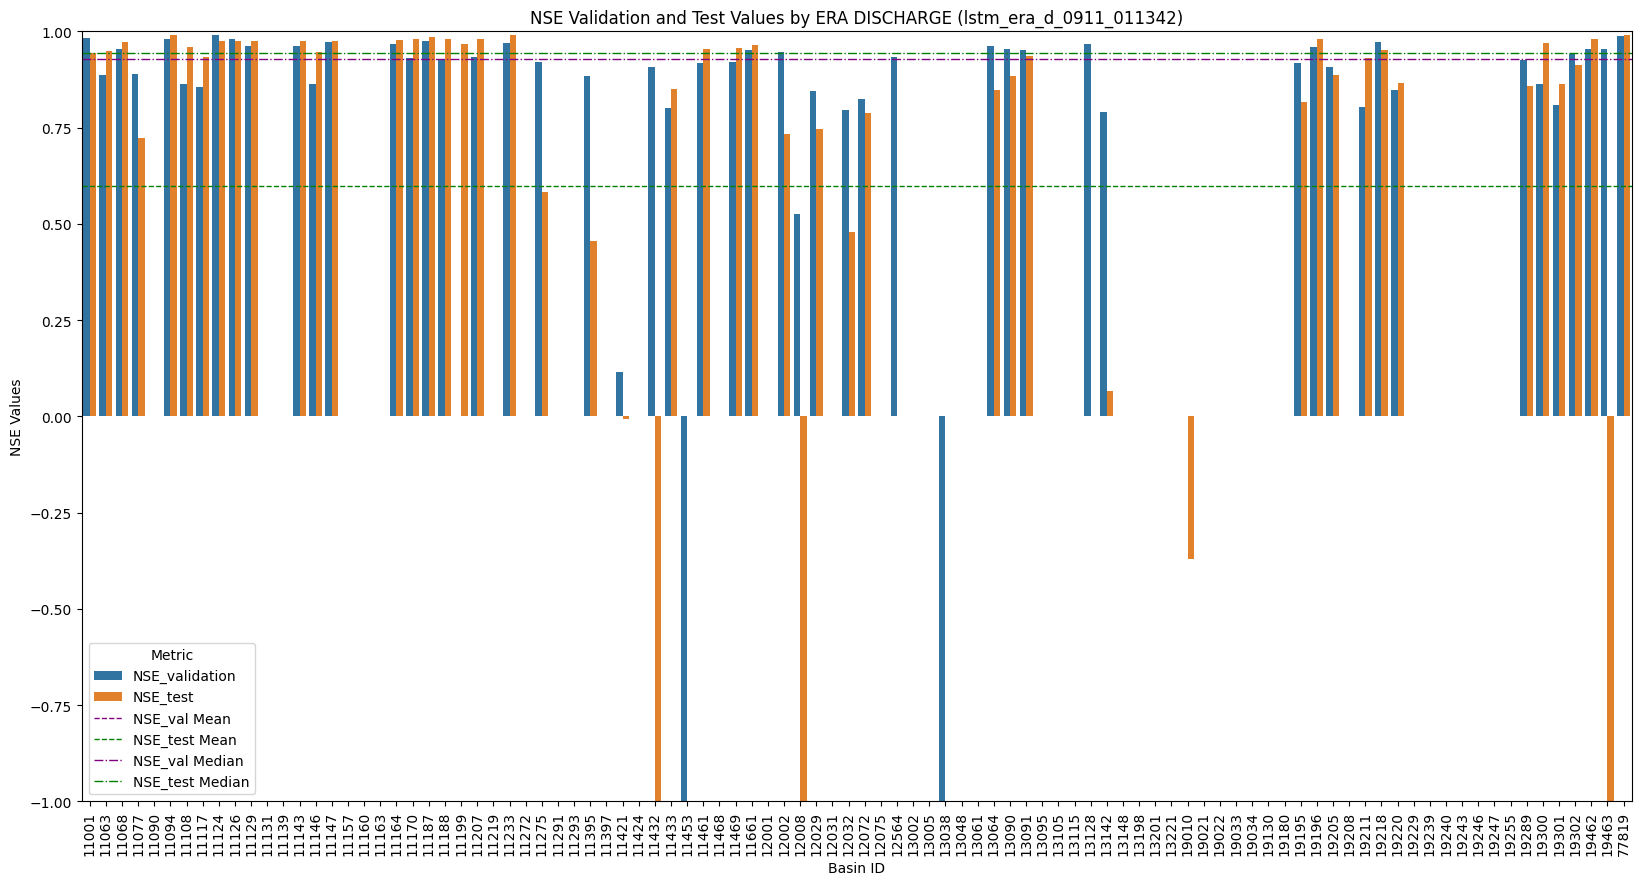

In [24]:
df_melted = pd.melt(df, id_vars="basin", value_vars=["NSE_validation", "NSE_test"], 
                    var_name="Metric", value_name="NSE Values")

plt.figure(figsize=(20, 10))

sns.barplot(data=df_melted, x="basin", y="NSE Values", hue="Metric") # palette={"NSE_validation": "blue", "NSE_test": "orange"}

plt.axhline(nse_val_mean, color='purple', linestyle='--', linewidth=1, label='NSE_val Mean')
plt.axhline(nse_test_mean, color='green', linestyle='--', linewidth=1, label='NSE_test Mean')
plt.axhline(nse_val_median, color='purple', linestyle='-.', linewidth=1, label='NSE_val Median')
plt.axhline(nse_test_median, color='green', linestyle='-.', linewidth=1, label='NSE_test Median')

plt.title("NSE Validation and Test Values by ERA DISCHARGE (lstm_era_d_0911_011342)")
plt.xlabel("Basin ID")
plt.ylabel("NSE Values")
plt.xticks(rotation=90)
plt.ylim(-1, 1)
plt.legend(title="Metric")

plt.show()
